# pib_componentes


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cwd_path = os.getcwd()
data_path = os.path.join(cwd_path, 'data')
input_path = os.path.join(data_path, 'input')
output_path = os.path.join(data_path, 'output')

In [33]:
filenames = ['consumo_privado', 'exportaciones', 'gasto_publico',
             'importaciones', 'inversiones', 'variacion']

tables_list = []
for filename in filenames:
    file_path = os.path.join(output_path, 'tables', f'{filename}.xlsx')
    df_table = pd.read_excel(file_path, names=['model', 'train_rmse', 'test_rmse'])
    df_table = df_table.sort_values('test_rmse').iloc[[0]]
    df_table['component'] = filename
    tables_list.append(df_table)

df_table = pd.concat(tables_list).set_index('component')
export_path = os.path.join(output_path, 'tables', 'champion_models.xlsx')
df_table.to_excel(export_path)


In [34]:
df_table

,model,train_rmse,test_rmse
component,,,
consumo_privado,lr,2052.214394,2513.108597
exportaciones,xgb,13.154549,2275.445493
gasto_publico,lr,2407.003495,15190.084475
importaciones,xgb,235.103659,3383.920983
inversiones,xgb,0.270193,1522.486746
variacion,lr,1255.879226,3105.390023


In [39]:
input_files = {'consumo_privado': 'y_test_consumo_privado.xlsx',
         'inversiones': 'y_test_inversiones.xlsx',
          'gasto_publico': 'y_test_gasto_publico.xlsx',
         'exportaciones': 'y_test_exportaciones.xlsx',
         'importaciones': 'y_test_importaciones.xlsx',
         'variacion' : 'y_test_variacion.xlsx'}

input_list = []
for name, filename in input_files.items():
    file_path = os.path.join(output_path, 'predictions', filename)
    df_input = pd.read_excel(file_path)
    df_input.rename(columns={'y_pred': name}, inplace=True)
    df_input.set_index('fa', inplace=True)
    input_list.append(df_input)

df_components = pd.concat(input_list, axis=1, join='outer')
df_components

file_path = os.path.join(input_path, 'sector_real', 'pib', 'pib.csv')
df_pib = pd.read_csv(file_path, sep=',')
df_pib.rename(columns={'Fecha': 'fa', 'Valor': 'pib'}, inplace=True)
df_pib['fa'] = pd.to_datetime(df_pib.fa, dayfirst=True)
df_pib.set_index('fa', inplace=True)

df = df_components.merge(df_pib, how='left', left_index=True, right_index=True)
df['pib_calc'] = (df.consumo_privado + df.inversiones + df.gasto_publico
                       + df.exportaciones - df.importaciones + df.variacion
                       )
df['pib_dif'] = df.pib - df.pib_calc
df['pib_per_dif'] = 100*df['pib_dif']/df.pib
df["pib_pct_change"] = df["pib"].pct_change() * 100
df["pib_calc_pct_change"] = df["pib_calc"].pct_change() * 100

export_path = os.path.join(output_path, 'tables', 'pib_componentes.xlsx')
df.to_excel(export_path)

In [40]:
df

,consumo_privado,inversiones,gasto_publico,exportaciones,importaciones,variacion,pib,pib_calc,pib_dif,pib_per_dif,pib_pct_change,pib_calc_pct_change
fa,,,,,,,,,,,,
2022-12-31,21624.365291,31954.167969,171709.899970,34974.359375,68285.054688,-532.190110,196342.55,191445.547808,4897.002192,2.494112,NaN,NaN
2023-03-31,21050.187167,31954.162109,169213.559531,34974.359375,68285.054688,4568.952902,200812.40,193476.166397,7336.233603,3.653277,2.276557,1.060677
2023-06-30,23211.470577,31954.167969,172418.990900,36092.750000,68285.054688,26.355245,200847.42,195418.680003,5428.739997,2.702917,0.017439,1.004007
2023-09-30,23397.185505,31954.119141,177977.100726,36092.750000,68264.671875,-155.530573,203697.61,201000.952924,2696.657076,1.323853,1.419082,2.856571
2023-12-31,23404.953089,31954.074219,176835.114319,36092.750000,68264.671875,-804.569714,212696.62,199217.650038,13478.969962,6.337181,4.417828,-0.887211
2024-03-31,22700.670707,31954.068359,160264.318842,36092.750000,68264.671875,2040.652844,215046.12,184787.788877,30258.331123,14.070624,1.104625,-7.243264
2024-06-30,24534.964944,31954.068359,161828.255912,36092.750000,68264.671875,-86.119262,214009.32,186059.248078,27950.071922,13.060212,-0.482129,0.688065


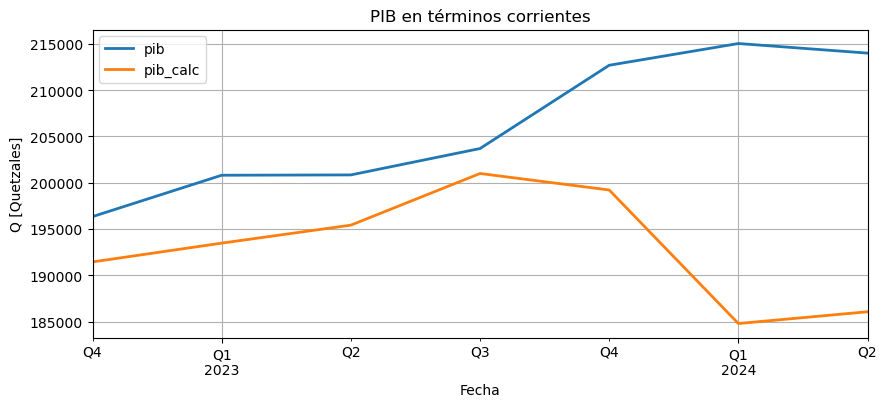

In [41]:
ax = df[['pib', 'pib_calc']].plot(
    grid=True, 
    linewidth=2, 
    figsize=(10, 4),
    title='PIB en términos corrientes',
    xlabel='Fecha', 
    ylabel='Q [Quetzales]'
)

export_path = os.path.join(output_path, 'figures', 'pib_componentes.png')
plt.savefig(export_path, dpi=300, bbox_inches='tight')
plt.show()

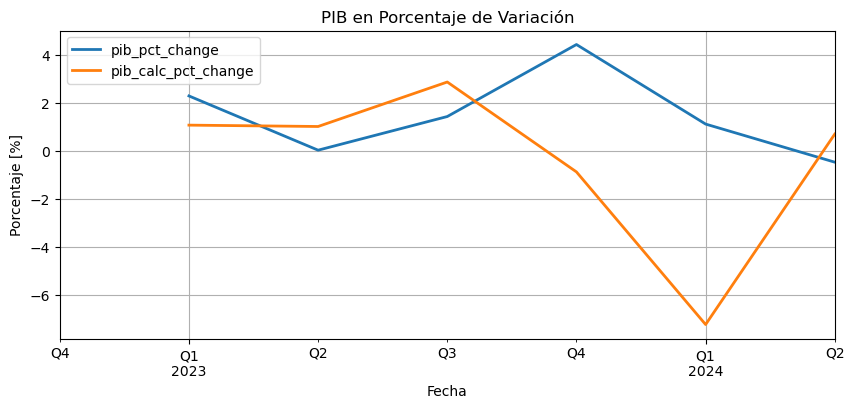

In [42]:
ax = df[['pib_pct_change', 'pib_calc_pct_change']].plot(
    grid=True, 
    linewidth=2, 
    figsize=(10, 4),
    title='PIB en Porcentaje de Variación',
    xlabel='Fecha', 
    ylabel='Porcentaje [%]'
)

export_path = os.path.join(output_path, 'figures', 'pib_var_componentes.png')
plt.savefig(export_path, dpi=300, bbox_inches='tight')
plt.show()